In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crawlfeeds/trustpilot-reviews-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/crawlfeeds/trustpilot-reviews-dataset/versions/1


In [10]:
! cp -r /root/.cache/kagglehub/datasets/crawlfeeds/trustpilot-reviews-dataset/versions/1 .

In [11]:
import pandas as pd
df=pd.read_csv("/content/1/trust_pilot_reviews_data_2022_06.csv")

In [12]:
df.head()

,name,company_url,trustpilot_url,description,author_name,review_title,review_text,rating,reviewed_at,uniq_id,scraped_at
0,Poundshop,https://www.poundshop.com/,https://uk.trustpilot.com/review/www.poundshop...,"The home for top brands, amazing value! We hav...",Colin,Lowest price in the country,Lowest price in the country for what we wanted...,5,2022-06-18T12:08:09.000Z,7e0edfe9-7251-5561-acc8-34f7d3ab79aa,06/18/22
1,Poundshop,https://www.poundshop.com/,https://uk.trustpilot.com/review/www.poundshop...,"The home for top brands, amazing value! We hav...",Mr Paul Harrison,got it on time they took notice that I…,got it on time they took notice that I let the...,5,2022-06-18T11:48:20.000Z,7e0edfe9-7251-5561-acc8-34f7d3ab79aa,06/18/22
2,Poundshop,https://www.poundshop.com/,https://uk.trustpilot.com/review/www.poundshop...,"The home for top brands, amazing value! We hav...",Mrs Dean,Delivered on time,"Delivered on time. Products as described, pack...",5,2022-06-18T11:32:52.000Z,7e0edfe9-7251-5561-acc8-34f7d3ab79aa,06/18/22
3,Poundshop,https://www.poundshop.com/,https://uk.trustpilot.com/review/www.poundshop...,"The home for top brands, amazing value! We hav...",Mrs Barlow,Quick and efficient service..,Quick and efficient service..Pleased,5,2022-06-18T11:29:27.000Z,7e0edfe9-7251-5561-acc8-34f7d3ab79aa,06/18/22
4,Poundshop,https://www.poundshop.com/,https://uk.trustpilot.com/review/www.poundshop...,"The home for top brands, amazing value! We hav...",Graham Bradbury,Excellent service packed well,Excellent service packed well. Really pleased.,5,2022-06-18T11:22:37.000Z,7e0edfe9-7251-5561-acc8-34f7d3ab79aa,06/18/22


In [13]:
df.shape

(3698, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            3698 non-null   object
 1   company_url     3698 non-null   object
 2   trustpilot_url  3698 non-null   object
 3   description     3012 non-null   object
 4   author_name     3697 non-null   object
 5   review_title    3698 non-null   object
 6   review_text     3698 non-null   object
 7   rating          3698 non-null   int64 
 8   reviewed_at     3698 non-null   object
 9   uniq_id         3698 non-null   object
 10  scraped_at      3698 non-null   object
dtypes: int64(1), object(10)
memory usage: 317.9+ KB


In [15]:
# rating
# review_text

df.drop(["name","company_url","trustpilot_url","description","uniq_id","scraped_at","reviewed_at","review_title","author_name",],axis=1,inplace=True)

In [16]:
df.head()

,review_text,rating
0,Lowest price in the country for what we wanted...,5
1,got it on time they took notice that I let the...,5
2,"Delivered on time. Products as described, pack...",5
3,Quick and efficient service..Pleased,5
4,Excellent service packed well. Really pleased.,5


In [17]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['rating'].apply(rating_to_sentiment)

In [24]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [26]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans("", "", string.punctuation))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return " ".join(tokens)
    return ""


df['cleaned_review_text'] = df['review_text'].apply(clean_text)


print(df[['review_text', 'cleaned_review_text']].head())

                                         review_text  \
0  Lowest price in the country for what we wanted...   
1  got it on time they took notice that I let the...   
2  Delivered on time. Products as described, pack...   
3               Quick and efficient service..Pleased   
4     Excellent service packed well. Really pleased.   

                                 cleaned_review_text  
0         lowest price country wanted cracking value  
1  got time took notice let know going morning th...  
2  delivered time product described packaging ok ...  
3                     quick efficient servicepleased  
4       excellent service packed well really pleased  


In [27]:
df.head()

,review_text,rating,sentiment,cleaned_review_text
0,Lowest price in the country for what we wanted...,5,positive,lowest price country wanted cracking value
1,got it on time they took notice that I let the...,5,positive,got time took notice let know going morning th...
2,"Delivered on time. Products as described, pack...",5,positive,delivered time product described packaging ok ...
3,Quick and efficient service..Pleased,5,positive,quick efficient servicepleased
4,Excellent service packed well. Really pleased.,5,positive,excellent service packed well really pleased


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_review_text'])
y=df['sentiment']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sentiment_model=LogisticRegression()
sentiment_model.fit(X_train, y_train)
y_pred = sentiment_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9067567567567567


In [33]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.63      0.75       130
     neutral       0.00      0.00      0.00        17
    positive       0.90      0.99      0.95       593

    accuracy                           0.91       740
   macro avg       0.61      0.54      0.57       740
weighted avg       0.89      0.91      0.89       740



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


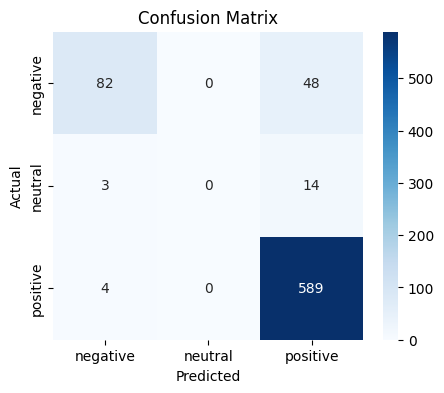

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=sentiment_model.classes_, yticklabels=sentiment_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [41]:
import numpy as np
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


def predict_sentiment():
    user_input = input("Enter a review: ")
    cleaned_input = preprocess_text(user_input)


    input_vectorized = vectorizer.transform([cleaned_input])


    prediction = sentiment_model.predict(input_vectorized)[0]
    proba = sentiment_model.predict_proba(input_vectorized)[0]
    print(f"\nPredicted Sentiment: {prediction}")
    print(f"Confidence Scores: {proba}")



predict_sentiment()


Enter a review: "Waste of money. Not as described and very poor quality."

Predicted Sentiment: negative
Confidence Scores: [0.73716698 0.02244525 0.24038776]
